# ValueError with `az.plot_joint()`

I am trying to reproduce one the plots in Osvaldo Martin's GitHub.
I want to plot the figure displayed at **cell 16** of [his Jupyter Notebook](https://github.com/aloctavodia/BAP/blob/master/code/Chp2/02%20Programming%20probabilistically.ipynb).

Unfortunately, I get an error: `Number of rows must be a positive integer, not 0` — see below.

## Setup

In [1]:
# import required modules
import numpy as np
import pymc3 as pm
import arviz as az

In [2]:
# load data
data = np.array( [51.06, 55.12, 53.73, 50.24, 52.05, 56.40, 48.45, 52.34, 55.65, 51.49, 51.86, 63.43, 
                  53.00, 56.09, 51.93, 52.31, 52.33, 57.48, 57.44, 55.14, 53.93, 54.62, 56.09, 68.58, 
                  51.36, 55.47, 50.73, 51.94, 54.95, 50.39, 52.91, 51.50, 52.68, 47.72, 49.73, 51.82, 
                  54.99, 52.84, 53.19, 54.52, 51.46, 53.73, 51.61, 49.81, 52.42, 54.30, 53.84, 53.16] )

In [3]:
# run PyMC3 model
with pm.Model() as model_g:
    # specify priors
    μ = pm.Uniform("μ", lower = 40, upper = 70)
    σ = pm.HalfNormal("σ", sd = 10)
    
    # specify likelihood
    y = pm.Normal("y", mu = μ, sd = σ,
                 observed = data)
    
    # start sampling
    trace_g = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, μ]
Sampling 4 chains: 100%|███████████████████████████████████████████████████████| 6000/6000 [00:06<00:00, 925.51draws/s]


## The error

In [4]:
# plot posteriors with plot_joint
az.plot_joint(trace_g, kind = "kde", fill_last = False)

C:\Users\Valerio\anaconda3\envs\bap\lib\site-packages\arviz\data\io_pymc3.py:78: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  log_likelihood, dims = self._extract_log_likelihood()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 432x288 with 0 Axes>

## Solution

Thanks to [OriolAbril](https://github.com/OriolAbril), who provided the solution [here](https://github.com/arviz-devs/arviz/issues/1633#issuecomment-807308617).

<AxesSubplot:xlabel='μ', ylabel='σ'>

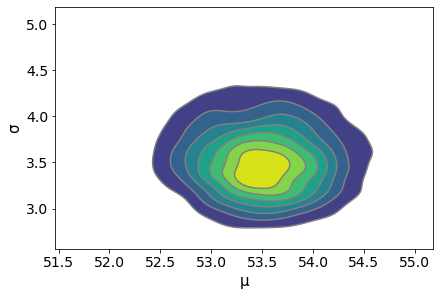

In [5]:
# plot posteriors with plot_pair instead of plot_joint
az.plot_pair(trace_g, kind = "kde", fill_last = False)

Unfortunately, I did not manage to plot the marginal distributions at the top and right sides of the figure.

In [6]:
# plot posteriors with plot_pair and marginals = True
az.plot_pair(trace_g, kind = "kde", fill_last = False, 
             marginals = True)

TypeError: plot_pair() got an unexpected keyword argument 'marginals'